Solution by Marceli P

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats


1. Create an X-Y scatter plot containing your data
2. Remove defective data points using the function e.g. zscore (outlier => 3)
3. Divide the data into training and test sets (random_state = 1)
4. Train polynomial regression models for polynomial degrees from 1 to 10
5. Select the best model, enter its degree and mean square error on the training and test sets,
6. Train polynomial ridge regression models for alpha 0, 1 and 10 and polynomial degrees from 1 to 10
7. Select the best model, enter its degree, alpha coefficient and mean square error on the training and test sets,
8. plot a line plot of the obtained functions against the background of the point data set for both types of regression (on the same plot)
9. provide the parameters of the best models


In [6]:
df = pd.read_csv('data.csv', sep=',', names=['A', 'B'])

In [7]:
df.head()

,A,B
0,23.840000,0.317402
1,23.080000,0.243897
2,20.755333,0.252954
3,20.057333,0.140816
4,16.888000,0.372653


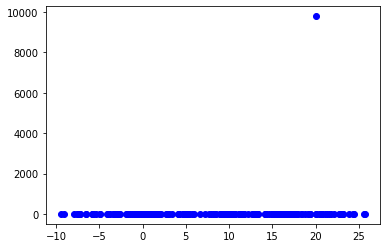

In [8]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue')

In [9]:
df.describe()

,A,B
count,200.000000,200.000000
mean,9.050975,51.488231
std,9.080632,691.725898
min,-9.434667,0.130889
25%,0.775167,0.357462
50%,10.202667,1.724813
75%,16.652167,5.096634
max,25.704667,9785.000000


In [10]:
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3))
print(z.iloc[175])

(array([175], dtype=int64), array([1], dtype=int64))
A     1.210254
B    14.106653
Name: 175, dtype: float64


In [11]:
print(df.iloc[175])
df.drop(175, inplace=True)
print(df.iloc[175])
df.describe()

A      20.013333
B    9785.000000
Name: 175, dtype: float64
A    17.797333
B     0.561017
Name: 176, dtype: float64


,A,B
count,199.000000,199.000000
mean,8.995888,2.576112
std,9.069970,2.379342
min,-9.434667,0.130889
25%,0.754333,0.357174
50%,10.202000,1.626511
75%,16.618667,5.066527
max,25.704667,7.725853


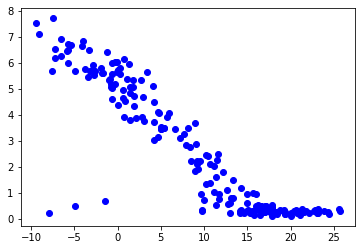

In [12]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue')

In [13]:
X = df.iloc[:, 0].to_numpy().reshape(-1,1)
Y = df.iloc[:, 1].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [15]:
def poly_reg(X, Y, deg):
    regression = PolynomialFeatures(degree=deg)
    features = regression.fit_transform(X)
    
    polynomial_regression = LinearRegression()
    polynomial_regression.fit(features, Y)
    return regression, polynomial_regression

In [16]:
y_prediction_res = []

def poly_train(i, X_train, X_test, y_train, y_test):
    features, model = poly_reg(X_train, y_train, i)
    space = np.linspace(0, 2, X_train.size).reshape(-1, 1)
    preds = model.predict(features.transform(space))
    

    colors = np.random.randn(len(df))
    plt.scatter(X, Y, c=colors)
    plt.plot(space, preds, color='r')
    
    preds_train = model.predict(features.transform(X_train))
    preds_test = model.predict(features.transform(X_test))
    y_prediction_res.append(preds_test)
    
    
    mse_train = mean_squared_error(y_train, preds_train)
    mse_test = mean_squared_error(y_test, preds_test)
    
    print('Degree: ', i)
    print('Train error: {}\nTest error: {}'.format(mse_train, mse_test))
    
    

Degree:  1
Train error: 1.0757657296605019
Test error: 0.7505261285442408
Degree:  2
Train error: 1.033979045327138
Test error: 0.7122254380848531
Degree:  3
Train error: 0.7437932802654471
Test error: 0.6886868090607019
Degree:  4
Train error: 0.7330100731933913
Test error: 0.7260481125992861
Degree:  5
Train error: 0.7029700045322557
Test error: 0.6932224584689696
Degree:  6
Train error: 0.696002191729374
Test error: 0.7083712699361217
Degree:  7
Train error: 0.6959812944531691
Test error: 0.7088336732869341
Degree:  8
Train error: 0.6914373095963261
Test error: 0.7050006822030335
Degree:  9
Train error: 0.6792577175588373
Test error: 0.7105881163990801


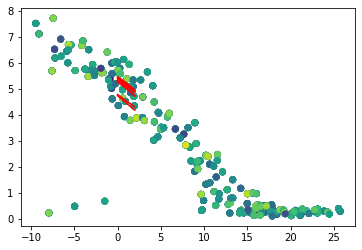

In [17]:
for i in  range(1, 10):
    poly_train(i, X_train, X_test, y_train, y_test)

The best model is for Grade 3
Train error: 0.7437932802654471
Test error: 0.6886868090607019

In [18]:
#Ridge regression
from sklearn.linear_model import Ridge

alphas = [0, 1, 10]

for a in alphas:
    model = Ridge(alpha = a)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    
    print("Alpha factor: ", a, "has mean squared error equal to: ", mean_squared_error(y_test, preds))
    
    
    


Alpha factor:  0 has mean squared error equal to:  0.7505261285442412
Alpha factor:  1 has mean squared error equal to:  0.7505368664418836
Alpha factor:  10 has mean squared error equal to:  0.7506357656079105


In [19]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline


alphas = [0, 1, 10]

def poly_reg_wrapper(X_train, Y_train, X_test, deg, alpha):
    model = make_pipeline(PolynomialFeatures(deg), Ridge(alpha=a))
    model.fit(X_train, Y_train)
    return model.predict(X_train), model.predict(X_test)


mses = {'train/test': [], 'alpha factor': [], 'degree': [], 'mean squared error': [], 'y': []}

for a in alphas:
    for i in range (1,11):
        train_preds, preds = poly_reg_wrapper(X_train, y_train, X_test, i, a)
        
        mses['train/test'].append('train')
        mses['alpha factor'].append(a)
        mses['degree'].append(i)
        mses['mean squared error'].append(mean_squared_error(y_train, train_preds))
        mses['y'].append(preds)

        
        mses['train/test'].append('test')
        mses['alpha factor'].append(a)
        mses['degree'].append(i)
        mses['mean squared error'].append(mean_squared_error(y_test, preds))
        mses['y'].append(train_preds)

        
#         print(f"[TRAIN]\tAlpha factor: {a} with degree {i} has mean squared error equal to: ", mean_squared_error(y_train, train_preds)) # błąd sredniokwadratowy
#         print(f"[TEST]\tAlpha factor: {a} with degree {i} has mean squared error equal to: ", mean_squared_error(y_test, preds)) # błąd sredniokwadratowy
#         print(5*"-")
        
results = pd.DataFrame(mses).sort_values(by='mean squared error')
print(results)
min_res_idx = results['mean squared error'].idxmin()
min_res = results.iloc[min_res_idx, :]



C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.5548e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.35547e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Marceli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30189e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Marceli\AppData\L

   train/test  alpha factor  degree  mean squared error  \
18      train             0      10            0.669792   
38      train             1      10            0.669793   
58      train            10      10            0.669921   
16      train             0       9            0.679258   
36      train             1       9            0.679260   
56      train            10       9            0.679463   
5        test             0       3            0.688687   
25       test             1       3            0.688820   
45       test            10       3            0.690029   
14      train             0       8            0.691437   
34      train             1       8            0.691440   
54      train            10       8            0.691664   
49       test            10       5            0.692274   
29       test             1       5            0.693119   
9        test             0       5            0.693222   
12      train             0       7            0.695981 

Best model was obtained with parameteres:
Alpha factor: 0
Degree: 10

"\n#Wykres dla  wszystkich stopni wielomianu\nfor i in range(0, len(y_prediction_res)):\n    plt.scatter(X_test, y_prediction_res[i], c='green')\n"

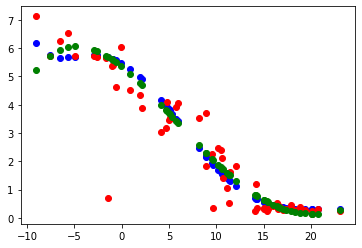

In [20]:

plt.scatter(X_test, min_res['y'], c='blue') #Ridge prediction + polynomial
plt.scatter(X_test, y_test, c='red') #Input data
plt.scatter(X_test, y_prediction_res[3], c='green') #Polynomial regression (3rd degree)

'''
#Graph for all degrees of the polynomial
for i in range(0, len(y_prediction_res)):
    plt.scatter(X_test, y_prediction_res[i], c='green')
'''


In [21]:
def sort_two_lists(list1, list2):
    merged = np.concatenate((list1, list2), axis=1)
    sorted_list = merged[merged[:, 0].argsort()]
    return(sorted_list)

In [22]:
ridge_sorted_predictions = sort_two_lists(X_test, min_res['y'])
polynomial_3_sorted_predictions = sort_two_lists(X_test, y_prediction_res[3])

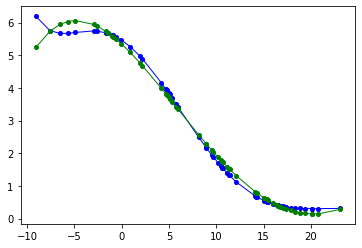

In [23]:
plt.plot(ridge_sorted_predictions[:, 0], ridge_sorted_predictions[:, 1], '-o',
                 linewidth=1, markersize=4, color='blue')
plt.plot(polynomial_3_sorted_predictions[:, 0], polynomial_3_sorted_predictions[:, 1], '-o',
                 linewidth=1, markersize=4, color='green')

#Green - polynomial 3rd degree (adding all degrees makes plot unreadable)
#Blue - ridge

Best polynomial parameter: Degree:  3
Best model for ridge was obtained with parameters: Alpha factor: 0 Degree: 10